In [11]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap9
/Users/jinceyang/Desktop/codebase/ml/learn_d2l already in Python path


In [12]:
from d2l.text.dataset import TimeMachineDataset

In [13]:
timemachine = TimeMachineDataset(root="../data", num_steps=35)
timemachine.num_samples, timemachine.vocab.size()

(4817, 28)

In [14]:
data = (iter(timemachine.get_train_dataloader(batch_size=32)))
for X, Y in data:
    print('X:', X.shape, '\n', X)
    print('Y:', Y.shape, '\n', Y)
    break

X: torch.Size([32, 35]) 
 tensor([[ 3,  9,  2,  ...,  4, 10, 23],
        [ 3,  1,  3,  ..., 11, 10,  4],
        [10, 19,  1,  ...,  2, 13,  4],
        ...,
        [ 2,  1, 16,  ...,  4, 11,  1],
        [12, 12,  5,  ..., 12, 16,  1],
        [ 5, 15,  1,  ...,  5,  8, 18]])
Y: torch.Size([32, 35]) 
 tensor([[ 9,  2,  1,  ..., 10, 23, 12],
        [ 1,  3,  9,  ..., 10,  4,  5],
        [19,  1, 15,  ..., 13,  4, 10],
        ...,
        [ 1, 16,  2,  ..., 11,  1,  4],
        [12,  5,  6,  ..., 16,  1, 17],
        [15,  1,  5,  ...,  8, 18, 14]])


In [15]:
import torch
import torch.nn as nn
rng = torch.Generator().manual_seed(0)

In [16]:
from d2l.text.model import RNNLanguageModel

In [17]:
from d2l.text.model import RNNLanguageModelTorch, LSTMLanguageModelTorch, LSTMLanguageModel

rnn_lm = RNNLanguageModel(
    input_size=timemachine.vocab.size(),
    hidden_size=32,
    num_layers=2
)
rnn_lm_torch = RNNLanguageModelTorch(
    input_size=timemachine.vocab.size(),
    hiddens_size=32,
    num_layers=2
)
lstm_lm = LSTMLanguageModel(
    input_size=timemachine.vocab.size(),
    hiddens_size=32,
    num_layers=2
)
lstm_lm_torch = LSTMLanguageModelTorch(
    input_size=timemachine.vocab.size(),
    hidden_size=32,
    num_layers=2
)

In [18]:
from d2l.text.evaluator import RNNEvaluator

def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = RNNEvaluator(model)
    loss = evaluator.loss(timemachine.get_test_dataloader(batch_size=timemachine.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')

In [19]:

from d2l.base.plot import plot_losses
from d2l.text.trainer import RNNTrainer
trainer = RNNTrainer(
    model=rnn_lm,
    optimizer=torch.optim.Adam(rnn_lm.parameters(), lr=0.01), 
    on_train_epoch_end=eval_on_epoch,
    is_train_progress_leave=False
)
rnn_epoch_loss = trainer.train(train_data_loaders=
              timemachine.get_train_dataloader_epochs(batch_size=4, num_epochs=10)
             )

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 0, validation loss 1.9698


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 1, validation loss 1.8942


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 2, validation loss 1.8617


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 3, validation loss 1.8561


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 4, validation loss 1.8358


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 5, validation loss 1.8131


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 6, validation loss 1.8165


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 7, validation loss 1.8144


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 8, validation loss 1.8102


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 9, validation loss 1.8073


In [20]:
from d2l.text.trainer import RNNTrainer
trainer = RNNTrainer(
    model=rnn_lm_torch,
    optimizer=torch.optim.Adam(rnn_lm_torch.parameters(), lr=0.01), 
    on_train_epoch_end=eval_on_epoch,
    is_train_progress_leave=False
)
rnn_epoch_loss_torch = trainer.train(train_data_loaders=
              timemachine.get_train_dataloader_epochs(batch_size=4, num_epochs=10)
             )

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 0, validation loss 1.9401


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 1, validation loss 1.8790


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 2, validation loss 1.8431


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 3, validation loss 1.8450


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 4, validation loss 1.8170


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 5, validation loss 1.8124


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 6, validation loss 1.8114


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 7, validation loss 1.7983


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 8, validation loss 1.8024


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 9, validation loss 1.7925


In [21]:
from d2l.text.trainer import RNNTrainer
trainer = RNNTrainer(
    model=lstm_lm,
    optimizer=torch.optim.Adam(lstm_lm.parameters(), lr=0.01), 
    on_train_epoch_end=eval_on_epoch,
    is_train_progress_leave=False
)
lstm_epoch_loss = trainer.train(train_data_loaders=
              timemachine.get_train_dataloader_epochs(batch_size=4, num_epochs=10)
             )

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 0, validation loss 1.8840


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 1, validation loss 1.7488


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 2, validation loss 1.6858


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 3, validation loss 1.6565


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 4, validation loss 1.6505


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 5, validation loss 1.6347


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 6, validation loss 1.6216


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 7, validation loss 1.6195


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 8, validation loss 1.6131


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 9, validation loss 1.6080


In [22]:
from d2l.text.trainer import RNNTrainer
trainer = RNNTrainer(
    model=lstm_lm_torch,
    optimizer=torch.optim.Adam(lstm_lm_torch.parameters(), lr=0.01), 
    on_train_epoch_end=eval_on_epoch,
    is_train_progress_leave=False
)
lstm_epoch_loss_torch = trainer.train(train_data_loaders=
              timemachine.get_train_dataloader_epochs(batch_size=4, num_epochs=10)
             )

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 0, validation loss 1.8994


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 1, validation loss 1.7770


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 2, validation loss 1.7071


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 3, validation loss 1.6766


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 4, validation loss 1.6603


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 5, validation loss 1.6406


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 6, validation loss 1.6342


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 7, validation loss 1.6306


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 8, validation loss 1.6183


Batch:   0%|          | 0/843 [00:00<?, ?it/s]

Epoch 9, validation loss 1.6247


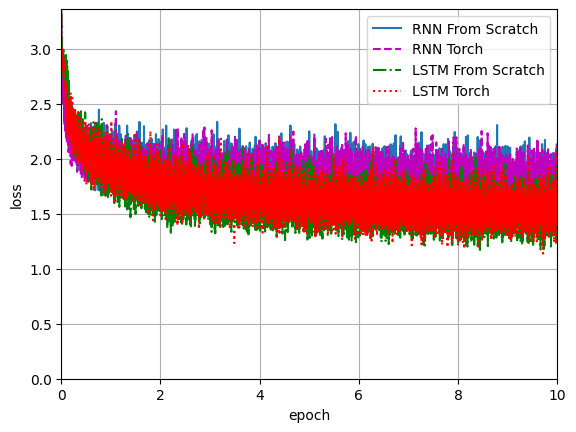

In [23]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plot_losses(ax, [rnn_epoch_loss, rnn_epoch_loss_torch, lstm_epoch_loss, lstm_epoch_loss_torch], 
            labels=['RNN From Scratch', 'RNN Torch', 'LSTM From Scratch', 'LSTM Torch'])

In [24]:
# save the models
torch.save(rnn_lm.state_dict(), 'rnn_lm_scratch.pth')
torch.save(rnn_lm_torch.state_dict(), 'rnn_lm_torch.pth')
torch.save(lstm_lm.state_dict(), 'lstm_lm_scratch.pth')
torch.save(lstm_lm_torch.state_dict(), 'lstm_lm_torch.pth')